In [49]:
from tensorflow.keras.datasets import mnist



In [50]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [51]:
X_train.shape

(60000, 28, 28)

In [52]:
X_test.shape

(10000, 28, 28)

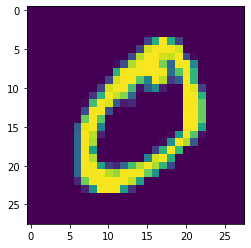

In [53]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[1])

In [54]:
#check image shape
X_train[0].shape

(28, 28)

In [55]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

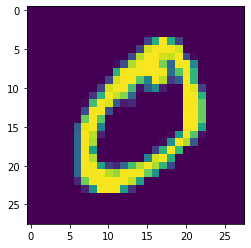

In [56]:
plt.imshow(X_train[1])

In [57]:
y_train[0]

5

In [58]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [60]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
X_train.shape

(60000, 28, 28, 1)

In [62]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [63]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 127s 67ms/step - loss: 0.2413 - accuracy: 0.9528 - val_loss: 0.0876 - val_accuracy: 0.9727
Epoch 2/3
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0656 - accuracy: 0.9806 - val_loss: 0.0707 - val_accuracy: 0.9769
Epoch 3/3
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0452 - accuracy: 0.9854 - val_loss: 0.0678 - val_accuracy: 0.9811


In [78]:
#predict first 4 images in the test set
y_hat = model.predict(X_test)

In [79]:
y_hat.shape

(10000, 10)

In [80]:
y_hat

array([[2.2569873e-08, 1.2912250e-12, 2.2124290e-07, ..., 9.9999189e-01,
        4.7566712e-07, 5.4344114e-06],
       [6.4089122e-06, 1.6508487e-07, 9.9989879e-01, ..., 5.0325688e-11,
        5.5419861e-07, 1.7454811e-10],
       [7.3363911e-09, 9.9987638e-01, 5.0835877e-07, ..., 1.2687775e-09,
        5.7010260e-05, 1.0504742e-09],
       ...,
       [1.4567633e-14, 1.3820702e-13, 1.3315888e-15, ..., 1.3255229e-07,
        6.4008667e-08, 2.8669052e-09],
       [1.2205478e-09, 2.6037939e-12, 3.2650859e-12, ..., 3.8726516e-10,
        1.4397056e-06, 3.8542609e-09],
       [5.7635077e-11, 4.7851307e-14, 6.5517272e-09, ..., 1.1769698e-13,
        5.8264555e-07, 9.1004371e-10]], dtype=float32)

In [75]:
y_hat = list(y_hat)

In [81]:
y_pred_list = []
for i in range(len(y_hat)):
    lst = list(y_hat[i])
    y_pred_list.append(lst)

In [82]:
y_pred_list

[[2.2569873e-08,
  1.291225e-12,
  2.212429e-07,
  1.857236e-06,
  3.8726564e-11,
  2.8977332e-10,
  1.3700738e-15,
  0.9999919,
  4.7566712e-07,
  5.4344114e-06],
 [6.408912e-06,
  1.6508487e-07,
  0.9998988,
  3.1410515e-08,
  6.390273e-10,
  7.9775403e-10,
  9.391298e-05,
  5.0325688e-11,
  5.541986e-07,
  1.7454811e-10],
 [7.336391e-09,
  0.9998764,
  5.0835877e-07,
  1.7873464e-07,
  6.151471e-05,
  4.2503916e-06,
  1.3692255e-08,
  1.2687775e-09,
  5.701026e-05,
  1.0504742e-09],
 [0.99999905,
  3.5946192e-13,
  3.9048973e-07,
  6.3204964e-13,
  2.637449e-10,
  4.2003405e-09,
  3.335743e-08,
  6.9339634e-10,
  3.2926353e-10,
  4.780659e-07],
 [2.1119115e-10,
  1.1136391e-08,
  2.6236407e-08,
  1.3626225e-09,
  0.9999789,
  3.759864e-11,
  8.758445e-09,
  1.4687055e-09,
  1.1432842e-08,
  2.1136659e-05],
 [6.585063e-09,
  0.9999876,
  7.331811e-08,
  1.4640922e-09,
  1.7177454e-06,
  2.4867559e-08,
  3.402816e-10,
  2.3515884e-06,
  8.095161e-06,
  7.772095e-08],
 [2.0738607e-13,


In [85]:
y_pred_final = []
for i in range(len(y_pred_list)):
    y_pred_final.append(y_pred_list[i].index(max(y_pred_list[i])))

In [86]:
y_pred_final

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 5,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 5,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 2,
 2,
 3,
 0,
 6,
 4,
 2,


In [87]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

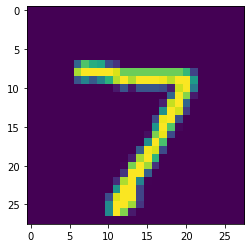

In [91]:
plt.imshow(X_test[0])